[![UAEM](https://www.uaem.mx/fcaei/images/uaem.png)](https://www.uaem.mx/fcaei/moca.html)
[![Python 3.9](https://img.shields.io/badge/Python-3.9-blue.svg)](https://www.python.org/downloads/release/python-390/)
[![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://github.com/EmilianoRdzV/AIR-QUALITY)

# Proyecto: Análisis y Predicción de la Calidad del Aire con Machine Learning

**Autor:** [Emiliano Rodriguez Villegas](https://github.com/EmilianoRdzV)
**Fecha:** 06 de Junio de 2025
**Versión:** 1.0

---

## 1. Introducción y Motivación

Este notebook presenta un análisis completo de la calidad del aire en seis metrópolis globales. El objetivo es aplicar un flujo de trabajo de ciencia de datos, desde la limpieza de datos hasta la construcción de un modelo de Machine Learning para clasificar la calidad del aire.

La elección de este conjunto de datos se basa en su **volumen**, la **diversidad geográfica** de las ciudades, la **riqueza de sus características** y su **componente temporal**, que lo hacen ideal para el análisis y la modelización.

---

### Índice General del Notebook

1.  [**Metodología y Preparación**](#fase-1)
    * [1.1. Diagrama de Flujo del Proyecto](#1-1)
    * [1.2. Carga de Datos desde URL](#1-2)
    * [1.3. Preprocesamiento y Limpieza](#1-3)
    * [1.4. Análisis Estadístico Descriptivo](#1-4)
2.  [**Modelado de Clasificación**](#fase-2)
    * [2.1. Preparación de Datos para el Modelo](#2-1)
    * [2.2. Entrenamiento del Modelo (Perceptrón / Adaline)](#2-2)
    * [2.3. Visualización de Resultados](#2-3)
3.  [**Discusión y Trabajo Futuro**](#fase-3)
    * [3.1. Análisis del Modelo y Propuestas de Mejora](#3-1)
    * [3.2. Comparación con la Literatura](#3-2)
    * [3.3. Trabajo Futuro](#3-3)

## <a id="fase-1"></a>1. Metodología y Preparación

### <a id="1-1"></a>1.1. Diagrama de Flujo del Proyecto

A continuación, se presenta un diagrama de flujo que resume visualmente la metodología y los pasos a seguir en este proyecto, desde la adquisición de los datos hasta la obtención de conclusiones.

![Diagrama de Flujo del Proyecto](../Data/FTrabajo.png)

### <a id="1-2"></a>1.2. Carga de Datos desde URL


Se procederá a cargar el conjunto de datos en un DataFrame de `pandas`. URL de la DB: https://www.kaggle.com/datasets/youssefelebiary/air-quality-2024/data


*** Se intento leer los datos directamente desde una URL pero por el volumen de datos no se realizo, no todas las DBs lo permiten, asi que se opto por descargar la DB y trabajarla desde el alojamiennto local en ../Data/Air_Quality.csv

### Carga de Datos

In [284]:
import pandas as pd 

rutaDatos = '../Data/Air_Quality.csv'
dataFrame = pd.read_csv(rutaDatos)

#Info bascia para observar el paronama de los datos
print (dataFrame.head())


                        Date      City     CO  CO2   NO2  SO2    O3  PM2.5  \
0  2024-01-01 00:00:00+00:00  Brasilia  323.0  NaN  23.8  2.8  42.0   12.0   
1  2024-01-01 01:00:00+00:00  Brasilia  318.0  NaN  21.9  2.7  40.0   12.5   
2  2024-01-01 02:00:00+00:00  Brasilia  309.0  NaN  19.2  2.6  39.0   12.1   
3  2024-01-01 03:00:00+00:00  Brasilia  295.0  NaN  16.3  2.4  38.0   11.4   
4  2024-01-01 04:00:00+00:00  Brasilia  270.0  NaN  13.0  2.1  40.0   10.2   

   PM10        AQI  
0  17.1  16.800000  
1  17.9  16.000000  
2  17.3  15.599999  
3  16.2  15.200000  
4  14.6  16.000000  


### <a id="1-3"></a>1.3. Preprocesamiento y Limpieza


En esta etapa, abordaremos los problemas comunes en los datos crudos para asegurar su calidad. El proceso se dividirá en:
1.  Identificar la cantidad de valores nulos (NaN).
2.  Imputar (rellenar) los valores nulos con una estrategia adecuada.
3.  Verificar y eliminar filas duplicadas.

**Justificación del Procedimiento:** No se eliminarán las filas con valores NaN directamente, ya que esto podría resultar en una pérdida significativa de datos secuenciales, lo cual es vital para el análisis de series temporales. En su lugar, se optará por la **interpolación lineal**, un método que estima un valor faltante basándose en los valores numéricos que lo rodean, asumiendo una progresión constante entre ellos. Esta es una técnica robusta para datos de sensores como los de calidad del aire.

In [285]:
# 1: Revisión de Valores Nulos (NaN)
# Contamos cuántos valores nulos hay en cada columna para entender la magnitud del problema.
print("* Conteo de Valores Nulos ANTES del preprocesamiento")
print(dataFrame.isnull().sum())

# 2: Imputación de Valores por Interpolación Lineal
# Rellenamos los valores NaN usando el método de interpolación lineal.
dataFrame.interpolate(method='linear', inplace=True)
dataFrame.fillna(method='bfill', inplace=True)

print("\n* Conteo de Valores Nulos DESPUÉS de la imputación")
print(dataFrame.isnull().sum())

* Conteo de Valores Nulos ANTES del preprocesamiento
Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

* Conteo de Valores Nulos DESPUÉS de la imputación
Date     0
City     0
CO       0
CO2      0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64


C:\Users\evrdz\AppData\Local\Temp\ipykernel_10524\3830640125.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataFrame.interpolate(method='linear', inplace=True)
C:\Users\evrdz\AppData\Local\Temp\ipykernel_10524\3830640125.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataFrame.fillna(method='bfill', inplace=True)


In [286]:
# 3: Verificación y Eliminación de Duplicados
print(f"\nNúmero de filas duplicadas encontradas: {dataFrame.duplicated().sum()}")

# Fila duplicada, se elimina.
dataFrame.drop_duplicates(inplace=True)

print("\n Preprocesamiento y limpieza de datos comletado.")


Número de filas duplicadas encontradas: 0

 Preprocesamiento y limpieza de datos comletado.


### Corregir el formato de la columna de fecha 
Convertiremos la columna de fecha al tipo `datetime`, despues se convertira en el index del Data Frame 

In [287]:
# Columna de texto a un objeto de fecha y hora (datetime)
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])

# Establece la columna 'Date' como el nuevo índice del DataFrame
dataFrame.set_index('Date', inplace=True)

# Verificamos que el cambio se haya realizado correctamente
print("--- Info después de procesar la fecha ---")
dataFrame.info()

print("\n--- DataFrame con índice de fecha ---")
display(dataFrame.head())

--- Info después de procesar la fecha ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52704 entries, 2024-01-01 00:00:00+00:00 to 2024-12-31 23:00:00+00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    52704 non-null  object 
 1   CO      52704 non-null  float64
 2   CO2     52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   AQI     52704 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB

--- DataFrame con índice de fecha ---


,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
Date,,,,,,,,,
2024-01-01 00:00:00+00:00,Brasilia,323.0,471.0,23.8,2.8,42.0,12.0,17.1,16.800000
2024-01-01 01:00:00+00:00,Brasilia,318.0,471.0,21.9,2.7,40.0,12.5,17.9,16.000000
2024-01-01 02:00:00+00:00,Brasilia,309.0,471.0,19.2,2.6,39.0,12.1,17.3,15.599999
2024-01-01 03:00:00+00:00,Brasilia,295.0,471.0,16.3,2.4,38.0,11.4,16.2,15.200000
2024-01-01 04:00:00+00:00,Brasilia,270.0,471.0,13.0,2.1,40.0,10.2,14.6,16.000000


### Guardamos el Data Frame ya procesado

In [288]:
# Ruta para el nuevo archivo CSV limpio
rutaArchivoLimpio = '../Data/AirQualityCleaned.csv'

# index=True asegura que la columna de fecha se guarde en el archivo
dataFrame.to_csv(rutaArchivoLimpio, index=True)

print(f"Los datos limpios se han guardado en: '{rutaArchivoLimpio}'")

Los datos limpios se han guardado en: '../Data/AirQualityCleaned.csv'


### <a id="1-4"></a>1.4. Análisis Estadístico Descriptivo

Una vez que los datos están limpios, es útil obtener un resumen numérico de alto nivel de todas las características. Utilizaremos la función `.describe()` 

In [289]:
# Estadísticas descriptiva
# Media, desviación estándar, valores mínimos y máximos, y los percentiles.
estadisticas = dataFrame.describe()

display(estadisticas)

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,467.441940,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339
std,159.589953,25.299260,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,159.000000,449.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,213.000000,461.839418,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835
75%,306.000000,471.585203,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330


## <a id="fase-2"></a>2. Fase 2: Análisis Exploratorio de Datos (EDA)

Con los datos ya limpios, podemos comenzar a explorarlos para entender sus características principales. En esta fase, buscaremos patrones y relaciones a través de resúmenes estadísticos y, fundamentalmente, visualizaciones gráficas. `matplotlib` `seaborn`

---

### <a id="2-1"></a>2.1. Análisis Descriptivo General

Aunque ya vimos una tabla de estadísticas en la fase anterior, las visualizaciones nos permiten entender la **distribución** de los datos de una manera más intuitiva. Crearemos histogramas para las columnas más importantes (AQI y los principales contaminantes) para observar cómo se reparten sus valores: si son simétricos, si tienen sesgos, etc.

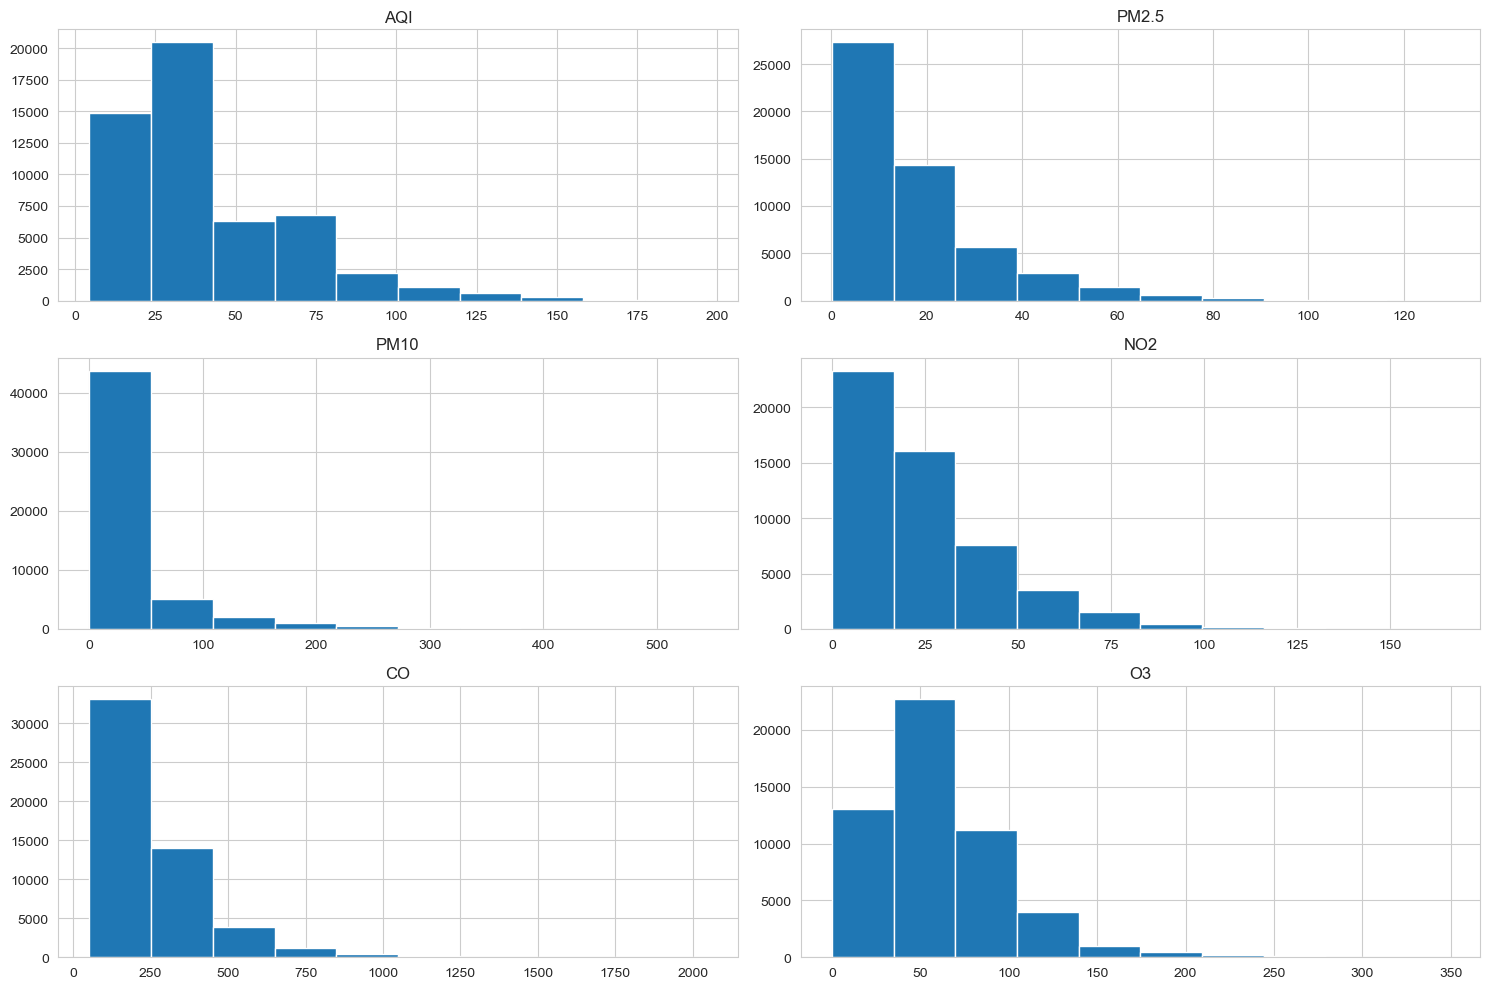

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos para que se vean mejor
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Columnas más relevantes para visualizar
columnasVisualizar = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3']

# Histograma para cada columna seleccionada
dataFrame[columnasVisualizar].hist()

plt.tight_layout()
plt.show()